# Linear & Quadratic Discriminant Analysis (LDA & QDA)

In this notebook, we will explore two fundamental probabilistic classifiers:
1. **Linear Discriminant Analysis (LDA)**
2. **Quadratic Discriminant Analysis (QDA)**

These methods model the distribution of the predictors $X$ in each of the response classes $Y$, and then use Bayes' theorem to flip these around into estimates for $Pr(Y=k|X=x)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification, make_moons

%matplotlib inline
sns.set_style('whitegrid')

## 1. Data Generation

We'll generate a synthetic dataset to demonstrate the differences between LDA and QDA. We'll use `make_moons` which creates a non-linear boundary, perfect for showing where LDA might struggle and QDA might shine (or vice versa depending on the noise).

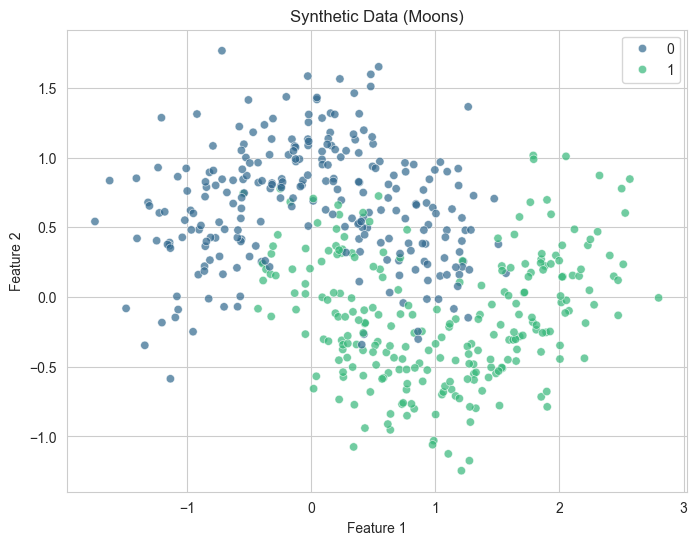

In [2]:
# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title("Synthetic Data (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 2. Linear Discriminant Analysis (LDA)

LDA assumes that the observations within each class are drawn from a multivariate Gaussian distribution with a class-specific mean vector and a **common** covariance matrix.

In [3]:
# Initialize and train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predictions
y_pred_lda = lda.predict(X_test)

# Evaluation
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("\nLDA Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.85

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        43
           1       0.94      0.79      0.86        57

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.87      0.85      0.85       100



## 3. Quadratic Discriminant Analysis (QDA)

QDA also assumes that the observations from each class are drawn from a Gaussian distribution, but unlike LDA, it assumes that each class has its **own** covariance matrix.

In [4]:
# Initialize and train QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predictions
y_pred_qda = qda.predict(X_test)

# Evaluation
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("\nQDA Classification Report:\n", classification_report(y_test, y_pred_qda))

QDA Accuracy: 0.85

QDA Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        43
           1       0.94      0.79      0.86        57

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.87      0.85      0.85       100



## 4. Visualizing Decision Boundaries

Let's visualize how LDA and QDA draw their decision boundaries.

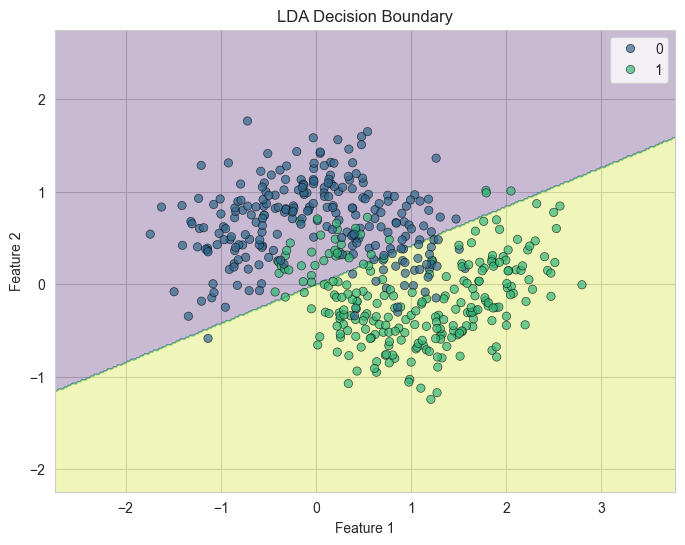

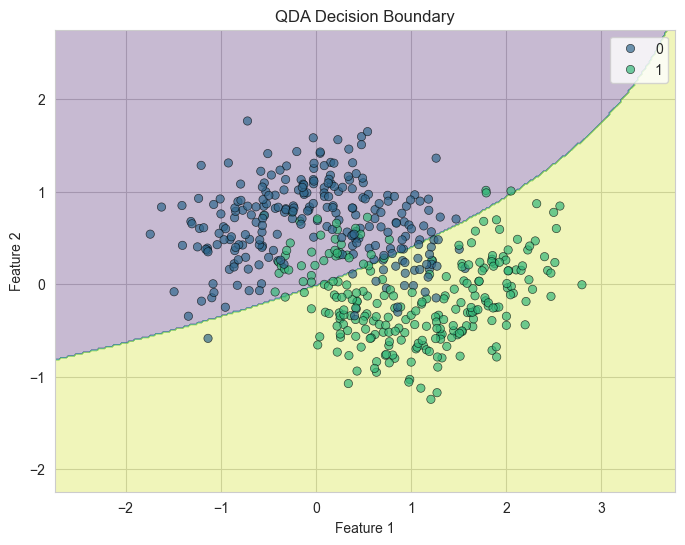

In [5]:
def plot_decision_boundary(model, X, y, title):
    # Define bounds of the domain
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(lda, X, y, "LDA Decision Boundary")
plot_decision_boundary(qda, X, y, "QDA Decision Boundary")

## 5. Conclusion

- **LDA** produces linear decision boundaries. It is less flexible but has lower variance. It works well when the assumption of a common covariance matrix holds.
- **QDA** produces quadratic (curved) decision boundaries. It is more flexible but has higher variance. It works well when the classes have significantly different covariance matrices.

In our example with the `make_moons` dataset, you should likely see QDA performing slightly better or capturing the curvature better than the straight line of LDA.